### TEMPLATE FOR PROJECT

In [48]:
%pip install pandas
%pip install matplotlib
%pip install meteostat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached meteostat-1.6.8-py3-none-any.whl.metadata (4.6 kB)
Using cached meteostat-1.6.8-py3-none-any.whl (31 kB)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Daily, Point, Hourly

In [ ]:
point = Point(45.5019, -73.5674)

bixi_2024 = pd.read_csv('C:\\Users\\histo\\individual_project_3125_bixi\\COMP_3125_Individual_Project_AidenDever\\data\\Bixi_2024.csv')
bixi_2024['STARTTIME'] = pd.to_datetime(bixi_2024['STARTTIMEMS'], unit='ms')
bixi_2024['ENDTIME'] = pd.to_datetime(bixi_2024['ENDTIMEMS'], unit='ms')

bixi_2024['trip_length_minutes'] = (pd.to_numeric(bixi_2024['ENDTIMEMS']) - pd.to_numeric(bixi_2024['STARTTIMEMS'])) * 60000


print(bixi_2024.columns)
print(bixi_2024.head())

Index(['STARTSTATIONNAME', 'STARTSTATIONARRONDISSEMENT',
       'STARTSTATIONLATITUDE', 'STARTSTATIONLONGITUDE', 'ENDSTATIONNAME',
       'ENDSTATIONARRONDISSEMENT', 'ENDSTATIONLATITUDE', 'ENDSTATIONLONGITUDE',
       'STARTTIMEMS', 'ENDTIMEMS', 'STARTTIME', 'ENDTIME',
       'trip_length_minutes'],
      dtype='object')
                  STARTSTATIONNAME       STARTSTATIONARRONDISSEMENT  \
0  Place Valois (Valois / Ontario)  Mercier - Hochelaga-Maisonneuve   
1  Place Valois (Valois / Ontario)  Mercier - Hochelaga-Maisonneuve   
2  Place Valois (Valois / Ontario)  Mercier - Hochelaga-Maisonneuve   
3  Place Valois (Valois / Ontario)  Mercier - Hochelaga-Maisonneuve   
4  Place Valois (Valois / Ontario)  Mercier - Hochelaga-Maisonneuve   

   STARTSTATIONLATITUDE  STARTSTATIONLONGITUDE  \
0             45.547018             -73.543126   
1             45.547018             -73.543126   
2             45.547018             -73.543126   
3             45.547018             -73.543126   


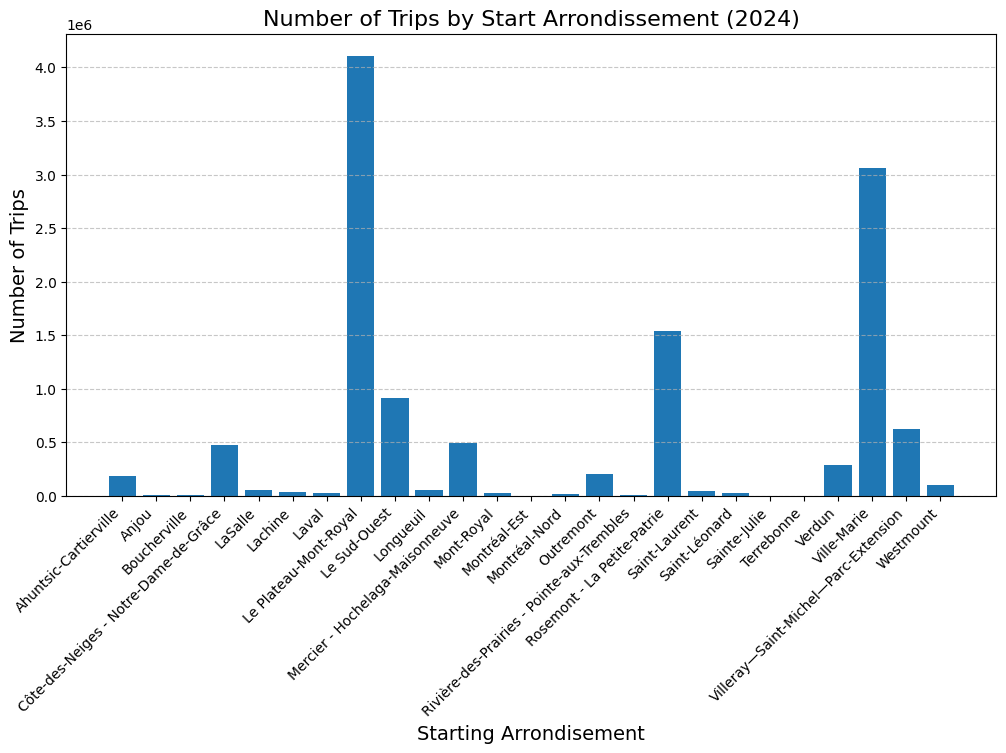

In [40]:
# Group data by Route Number
route_stats = bixi_2024.groupby('STARTSTATIONARRONDISSEMENT').agg(
    num_trips=('STARTSTATIONNAME', 'count'),
    num_unique_stations=('STARTSTATIONNAME', 'nunique')
).reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(route_stats['STARTSTATIONARRONDISSEMENT'], route_stats['num_trips'])
plt.title('Number of Trips by Start Arrondissement (2024)', fontsize=16)
plt.xlabel('Starting Arrondisement', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

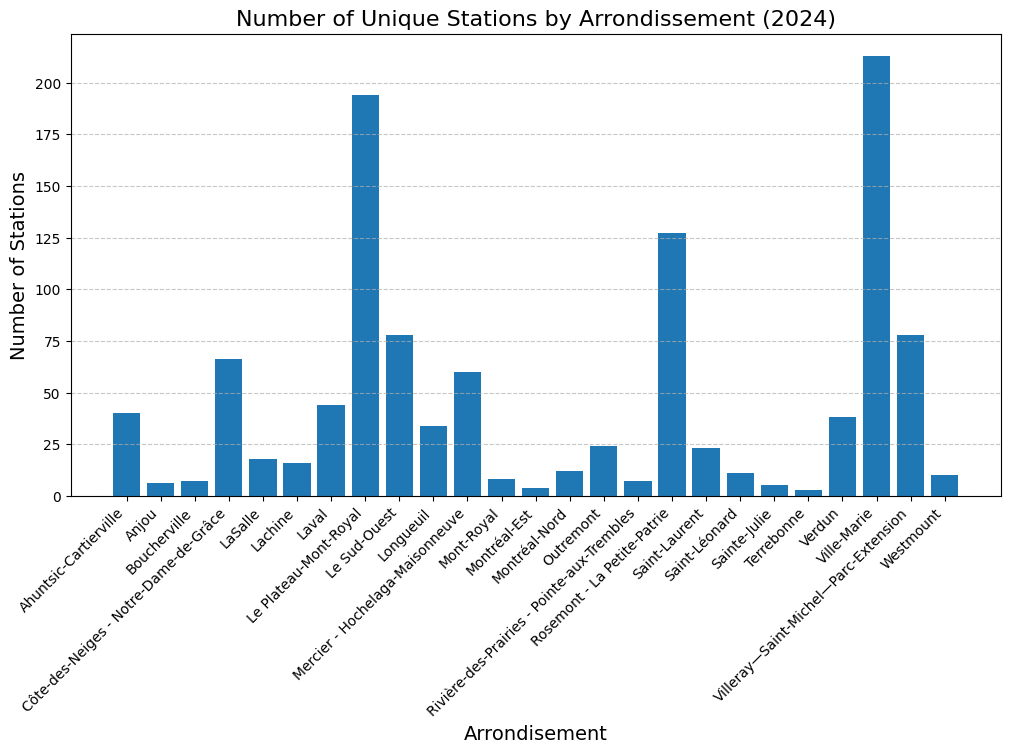

In [41]:
# Group data by Route Number
route_stats = bixi_2024.groupby('STARTSTATIONARRONDISSEMENT').agg(
    num_trips=('STARTSTATIONNAME', 'count'),
    num_unique_stations=('STARTSTATIONNAME', 'nunique')
).reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(route_stats['STARTSTATIONARRONDISSEMENT'], route_stats['num_unique_stations'])
plt.title('Number of Unique Stations by Arrondissement (2024)', fontsize=16)
plt.xlabel('Arrondisement', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

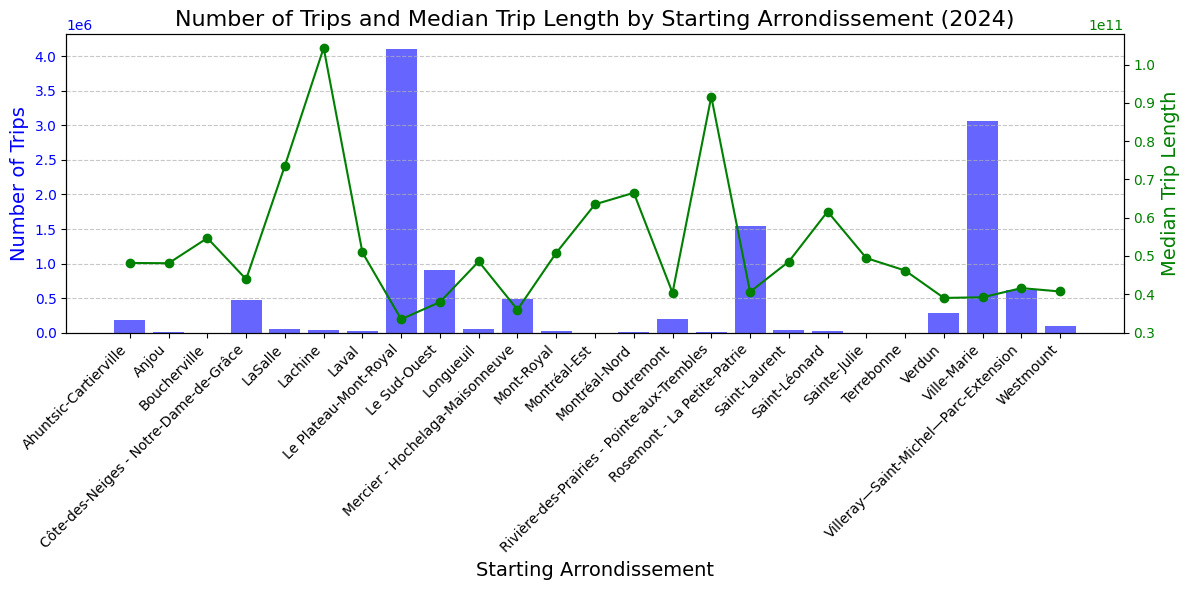

In [47]:
# Group data by Route Number
route_stats = bixi_2024.groupby('STARTSTATIONARRONDISSEMENT').agg(
    median_trip_length=('trip_length_minutes', 'median'),
    num_trips=('STARTSTATIONNAME', 'count'),
    num_unique_stations=('STARTSTATIONNAME', 'nunique')
).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for num_trips (primary y-axis)
ax1.bar(route_stats['STARTSTATIONARRONDISSEMENT'], route_stats['num_trips'], color='b', alpha=0.6, label='Number of Trips')
ax1.set_xlabel('Starting Arrondissement', fontsize=14)
ax1.set_ylabel('Number of Trips', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for median_trip_length
ax2 = ax1.twinx()
ax2.plot(route_stats['STARTSTATIONARRONDISSEMENT'], route_stats['median_trip_length'], color='g', marker='o', label='Median Trip Length')
ax2.set_ylabel('Median Trip Length', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set title and grid
plt.title('Number of Trips and Median Trip Length by Starting Arrondissement (2024)', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)  # Apply rotation
    tick.set_ha('right')   # Set horizontal alignment to 'right'

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()